In [8]:
# !pip
# Referred Doc: https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35

In [18]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0-dev20201018


In [15]:
vocab_size = 5000

embedding_dim = 64

max_length = 10
trunc_type = 'post'
padding_type = 'post'

oov_tok = '<OOV>'

training_portion = .8

In [16]:
articles = []
labels = []

In [17]:
with open("education_sample_labelled.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        articles.append(row[0])
        labels.append(row[1])

print(len(max(articles, key=len).split()))
print(len(labels))
print(len(articles))

14
1974
1974


In [22]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1579
1579
1579
395
395


In [23]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'and': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'university': 6,
 'the': 7,
 'management': 8,
 'business': 9,
 'a': 10}

In [25]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[2])

[1310, 1311]


In [26]:
#For Training set 
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Sample 0
print(len(train_sequences[0]))
print(len(train_padded[0]))
print(train_padded[0])

2
10
[16 52  0  0  0  0  0  0  0  0]


In [27]:
##For Valdiation set 
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

395
(395, 10)


In [68]:
#This isnt necessary since we have number representaton, where convert to numpy arrays

label_tokenizer = Tokenizer()
print(labels[:10])
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

['3', '0', '2', '1', '3', '2', '0', '2', '0', '1']
[4]
[1]
[2]
(1579, 1)
[1]
[2]
[2]
(395, 1)


In [28]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

the chinese university of hong kong graduated in may 2010
---
The Chinese University of Hong Kong Graduated in May 2010


In [29]:
#look into layers more

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
50/50 - 7s - loss: 1.4563 - accuracy: 0.4161 - val_loss: 1.2752 - val_accuracy: 0.4532
Epoch 2/10
50/50 - 1s - loss: 1.1630 - accuracy: 0.5028 - val_loss: 0.9549 - val_accuracy: 0.6456
Epoch 3/10
50/50 - 1s - loss: 0.6159 - accuracy: 0.7954 - val_loss: 0.6599 - val_accuracy: 0.7215
Epoch 4/10
50/50 - 1s - loss: 0.3517 - accuracy: 0.8968 - val_loss: 0.6384 - val_accuracy: 0.7494
Epoch 5/10
50/50 - 1s - loss: 0.2483 - accuracy: 0.9170 - val_loss: 0.5870 - val_accuracy: 0.7570
Epoch 6/10
50/50 - 1s - loss: 0.2120 - accuracy: 0.9278 - val_loss: 0.7834 - val_accuracy: 0.7468
Epoch 7/10
50/50 - 1s - loss: 0.1768 - accuracy: 0.9348 - val_loss: 0.7279 - val_accuracy: 0.7468
Epoch 8/10
50/50 - 1s - loss: 0.1661 - accuracy: 0.9341 - val_loss: 0.6775 - val_accuracy: 0.7747
Epoch 9/10
50/50 - 1s - loss: 0.1536 - accuracy: 0.9417 - val_loss: 0.7507 - val_accuracy: 0.7671
Epoch 10/10
50/50 - 1s - loss: 0.1445 - accuracy: 0.9379 - val_loss: 0.6993 - val_accuracy: 0.7696


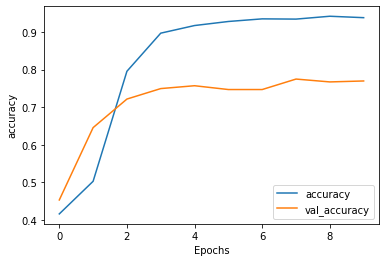

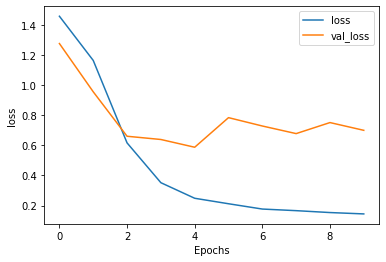

In [86]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Issues
1. since short sentences go with vanilla RNN rather than LSTM?
2. To how extent preprocessing should be done on cleaning? clear prepositions too?
3. Use of batches